### **Analyst = Kofi Anane Poku**

### **Linkedin Profile : linkedin.com/in/kofi-poku-anane**

#### **TABLE OF CONTENT**

Link to Download Dataset

Link :

**This project consist of the analysis of store sales from Corporación Favorita, a large Ecuadorian-based grocery retailer.In this analysis, facebook prophet is used in forecasting the sale prices of 2018 and 2019 based on the historic dataset from 2013 to 2017**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
# import itertools

In [2]:
df = pd.read_csv("train.csv")
df.head(1)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [3]:
df.date.dtype

dtype('O')

In [4]:
df = pd.read_csv("train.csv", low_memory= False , parse_dates=['date'])
df.head(1)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [5]:
df.date.dtype

dtype('<M8[ns]')

# **Data Cleaning** 

In [6]:
df.dtypes.value_counts()

int64             3
datetime64[ns]    1
object            1
float64           1
Name: count, dtype: int64

In [7]:
#cleaning numeric columns first
df_numeric = df.select_dtypes(include = ['int64' ,'int32' ,'float64'])
df_numeric =  df_numeric.fillna(df_numeric.median())
df.update(df_numeric)

In [8]:
#cleaning object variables by turning them into category

df_object = df.select_dtypes(include=['object'])

for key in df_object.columns:
    df[key] = pd.Categorical(df_object[key]).codes + 1


df.update(df)

# Extract datetime parameters from `date` column

In [9]:
df['SaleYear'] = df.date.dt.year
df['SaleMonth'] = df.date.dt.month
df['SaleDay'] = df.date.dt.day

In [10]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,SaleYear,SaleMonth,SaleDay
0,0,2013-01-01,1,1,0.0,0,2013,1,1
1,1,2013-01-01,1,2,0.0,0,2013,1,1
2,2,2013-01-01,1,3,0.0,0,2013,1,1
3,3,2013-01-01,1,4,0.0,0,2013,1,1
4,4,2013-01-01,1,5,0.0,0,2013,1,1


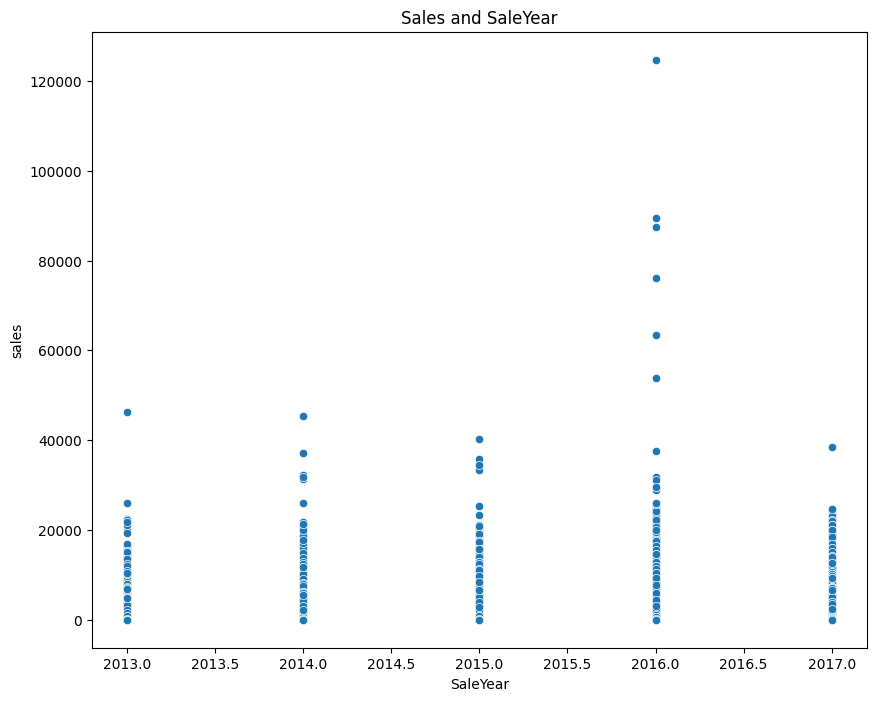

In [11]:
plt.figure(figsize= (10,8))
sns.scatterplot(x = df['SaleYear'] ,
                y= df['sales'])
plt.title("Sales and SaleYear");


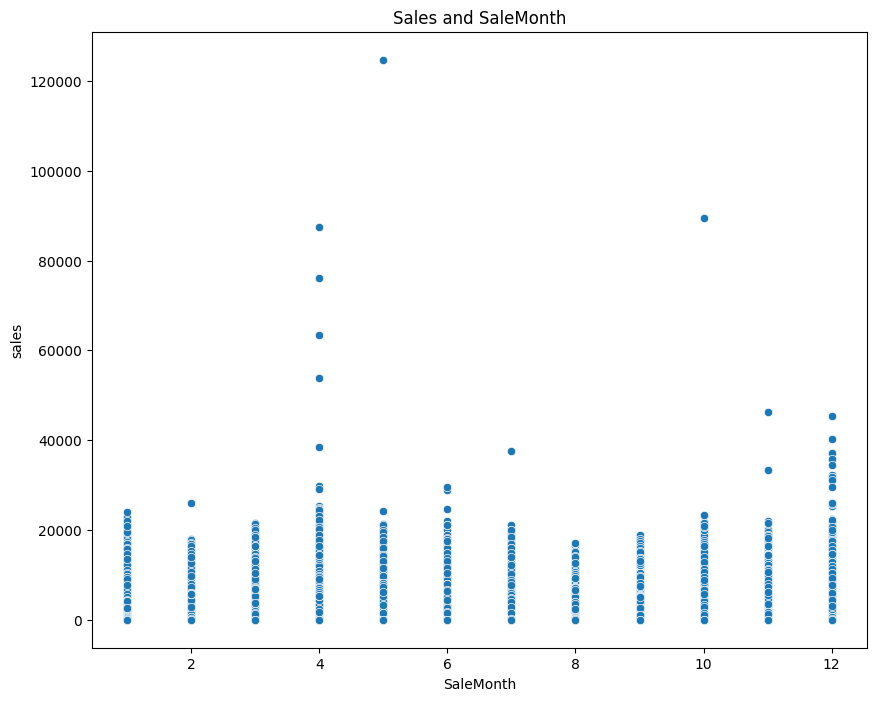

In [12]:
plt.figure(figsize= (10,8))
sns.scatterplot(x = df['SaleMonth'] ,
                y= df['sales'])
plt.title("Sales and SaleMonth");


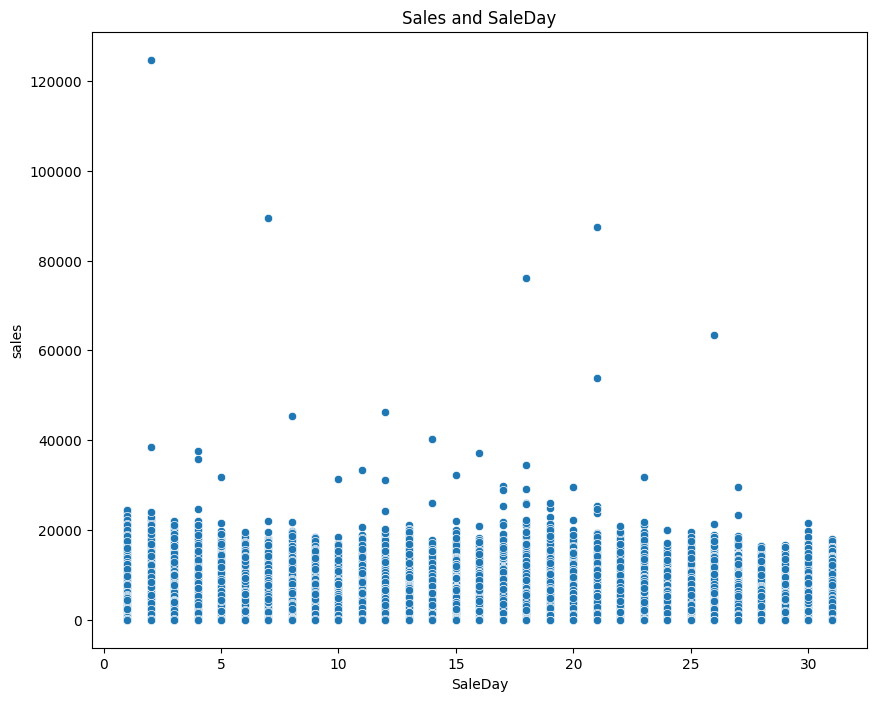

In [13]:
plt.figure(figsize= (10,8))
sns.scatterplot(x = df['SaleDay'] ,
                y= df['sales'])
plt.title("Sales and SaleDay");


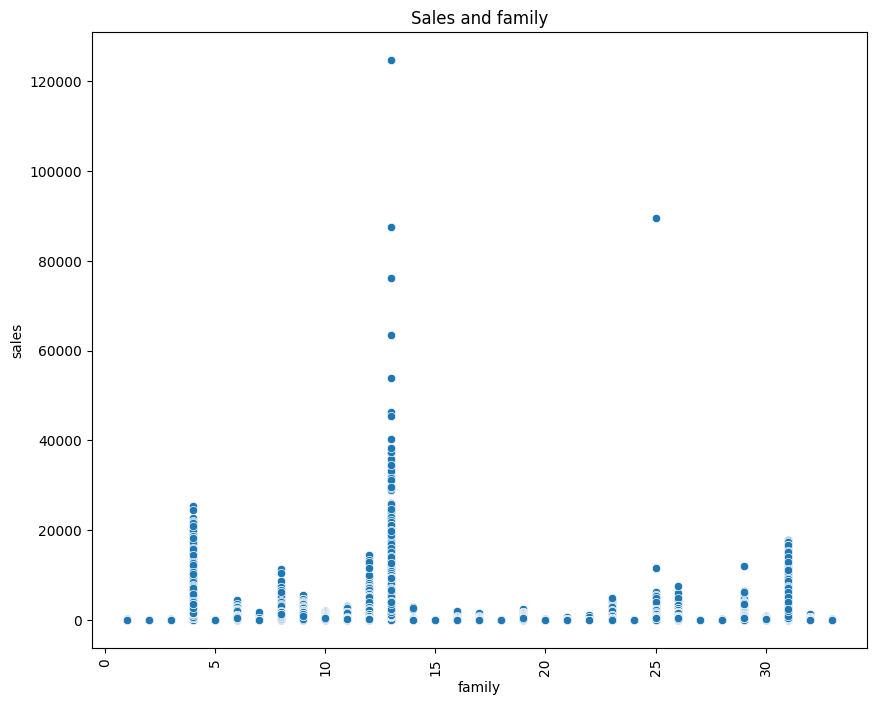

In [14]:
plt.figure(figsize= (10,8))
sns.scatterplot(x = df['family'] ,
                y= df['sales'])
plt.title("Sales and family")
plt.xticks(rotation = 90);


In [15]:
df.head(1)

,id,date,store_nbr,family,sales,onpromotion,SaleYear,SaleMonth,SaleDay
0,0,2013-01-01,1,1,0.0,0,2013,1,1


In [16]:
df.SaleYear.value_counts()

SaleYear
2016    650430
2013    648648
2014    648648
2015    648648
2017    404514
Name: count, dtype: int64

In [17]:
df.sort_values(by = ['SaleYear'] , ascending=True , inplace = True)


## **Facebook Prophet**

Facebook prophet is used for predicting and forcasting time series data

Here ,we are using facebook prophet to predict sales priced for the next two years using historical data(That is the train data)

In [18]:
# Rename column to fit prophet format
df.rename(columns={'date' : 'ds',
                   'sales' : 'y'} ,
                    inplace=True)

df.head(2)

,id,ds,store_nbr,family,y,onpromotion,SaleYear,SaleMonth,SaleDay
0,0,2013-01-01,1,1,0.000,0,2013,1,1
432428,432428,2013-08-31,41,30,80.875,0,2013,8,31


In [19]:
# Set the 'date' column as the index
df.set_index('ds', inplace=True)

In [20]:
# Resample the data to monthly frequency, aggregating by sum (or any other method like mean)
df = df.resample('ME').sum()

In [21]:
df.reset_index(inplace=True)

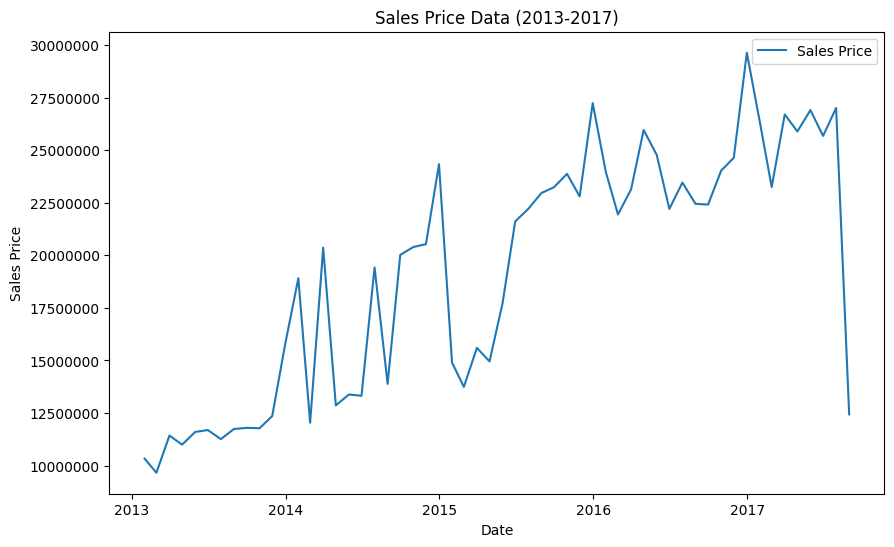

In [22]:
# Plot the dataset from 2013 to 2017
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Sales Price')
plt.xlabel('Date')
plt.ylabel('Sales Price')
plt.title('Sales Price Data (2013-2017)')
plt.ticklabel_format(style='plain' , axis='y')
plt.legend()
plt.show()

**The dataset is from store sales from Corporación Favorita, a large Ecuadorian-based grocery retailer. The price 
of the items keep increasing from year to year , from 2013 to 2017. We are going to use this historic data to predict the sales price of 2018 and 2019 whether the sale prices will increase or decrease.**

In [23]:
#Instantiating the prophet model
model =  Prophet(growth = 'linear' ,
                 yearly_seasonality = True ,
                 weekly_seasonality =True ,
                 daily_seasonality = False ,
                 seasonality_mode = 'additive' ,
                 seasonality_prior_scale = 10 ,
                 holidays_prior_scale =10 ,
                 changepoint_prior_scale = 0.05
                 )

In [24]:
model.fit(df)

15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:36 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Generate future dates for the next 2 years (2018-2019)
future = model.make_future_dataframe(periods=24, freq='M')

c:\python312.6\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [26]:
future

,ds
0,2013-01-31
1,2013-02-28
2,2013-03-31
3,2013-04-30
4,2013-05-31
...,...
75,2019-04-30
76,2019-05-31
77,2019-06-30
78,2019-07-31


In [27]:
# future = pd.concat([future, df.iloc[: , 2:]])


In [28]:
#Generate predictions using the pedict function
forecast = model.predict(future)


In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-31,1.144385e+07,7.403200e+06,1.364969e+07,1.144385e+07,1.144385e+07,-1.075405e+06,-1.075405e+06,-1.075405e+06,-1.780151e+06,-1.780151e+06,-1.780151e+06,7.047462e+05,7.047462e+05,7.047462e+05,0.0,0.0,0.0,1.036844e+07
1,2013-02-28,1.171259e+07,4.292758e+06,1.059047e+07,1.171259e+07,1.171259e+07,-4.252699e+06,-4.252699e+06,-4.252699e+06,-1.780151e+06,-1.780151e+06,-1.780151e+06,-2.472547e+06,-2.472547e+06,-2.472547e+06,0.0,0.0,0.0,7.459888e+06
2,2013-03-31,1.201012e+07,9.734171e+06,1.574800e+07,1.201012e+07,1.201012e+07,7.976811e+05,7.976811e+05,7.976811e+05,5.697509e+05,5.697509e+05,5.697509e+05,2.279302e+05,2.279302e+05,2.279302e+05,0.0,0.0,0.0,1.280780e+07
3,2013-04-30,1.229805e+07,8.223359e+06,1.465085e+07,1.229805e+07,1.229805e+07,-8.284490e+05,-8.284490e+05,-8.284490e+05,-1.928359e+05,-1.928359e+05,-1.928359e+05,-6.356131e+05,-6.356131e+05,-6.356131e+05,0.0,0.0,0.0,1.146960e+07
4,2013-05-31,1.259558e+07,9.130390e+06,1.556941e+07,1.259558e+07,1.259558e+07,-1.894332e+05,-1.894332e+05,-1.894332e+05,4.075590e+05,4.075590e+05,4.075590e+05,-5.969922e+05,-5.969922e+05,-5.969922e+05,0.0,0.0,0.0,1.240615e+07


In [30]:
# Show forecasted values for the future
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20))

           ds          yhat    yhat_lower    yhat_upper
60 2018-01-31  2.982496e+07  2.664854e+07  3.289728e+07
61 2018-02-28  2.700078e+07  2.378783e+07  3.031532e+07
62 2018-03-31  2.983253e+07  2.672401e+07  3.319605e+07
63 2018-04-30  2.977008e+07  2.624407e+07  3.301366e+07
64 2018-05-31  2.709147e+07  2.390902e+07  3.024652e+07
65 2018-06-30  2.914217e+07  2.598290e+07  3.210241e+07
66 2018-07-31  3.126410e+07  2.806950e+07  3.454201e+07
67 2018-08-31  2.765343e+07  2.420511e+07  3.048219e+07
68 2018-09-30  3.177687e+07  2.854325e+07  3.475280e+07
69 2018-10-31  3.249399e+07  2.923127e+07  3.548392e+07
70 2018-11-30  3.190168e+07  2.903116e+07  3.494845e+07
71 2018-12-31  3.849704e+07  3.522210e+07  4.182753e+07
72 2019-01-31  3.133721e+07  2.831512e+07  3.427323e+07
73 2019-02-28  2.860288e+07  2.564529e+07  3.204725e+07
74 2019-03-31  3.466685e+07  3.146973e+07  3.761450e+07
75 2019-04-30  3.138196e+07  2.839410e+07  3.473014e+07
76 2019-05-31  3.216796e+07  2.895159e+07  3.533

In [31]:
# To retrieve the predictions 
predictions = forecast.yhat
predictions

0     1.036844e+07
1     7.459888e+06
2     1.280780e+07
3     1.146960e+07
4     1.240615e+07
          ...     
75    3.138196e+07
76    3.216796e+07
77    3.377449e+07
78    3.580410e+07
79    3.041234e+07
Name: yhat, Length: 80, dtype: float64

In [32]:
print("Length of df.y:", len(df.y))
print("Length of predictions:", len(predictions))


Length of df.y: 56
Length of predictions: 80


In [33]:
predictions = predictions[:len(df.y)]  # Trim predictions to match df.y length


In [34]:
# Error Assessment
from sklearn.metrics import mean_absolute_error ,mean_squared_error

print( "Mean Absolute Error (MAE) : " , mean_absolute_error(df.y , predictions))
print("Mean Squared Error (MSE) : " , np.sqrt( mean_squared_error(df['y'] ,predictions)))

Mean Absolute Error (MAE) :  1925824.7174038254
Mean Squared Error (MSE) :  2479417.011660839


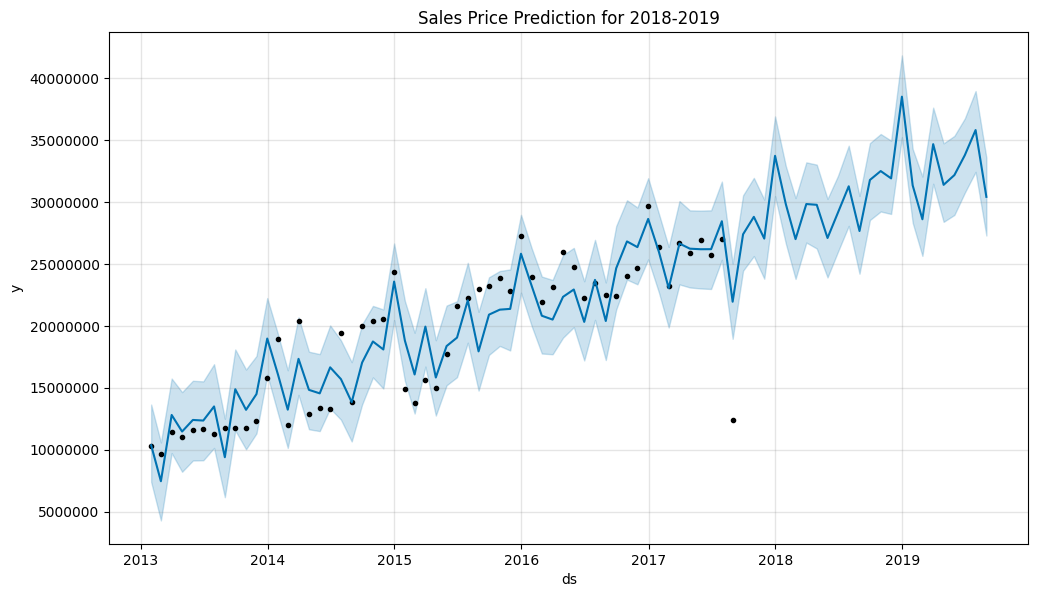

In [35]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Price Prediction for 2018-2019')
plt.ticklabel_format(style='plain' , axis='y')
plt.show()

**The sale prices from the store keeps on increasing from 2018 to 2019. This indicate that the sale price for 2018 and 2019 will be increasing as the following years after 2019**

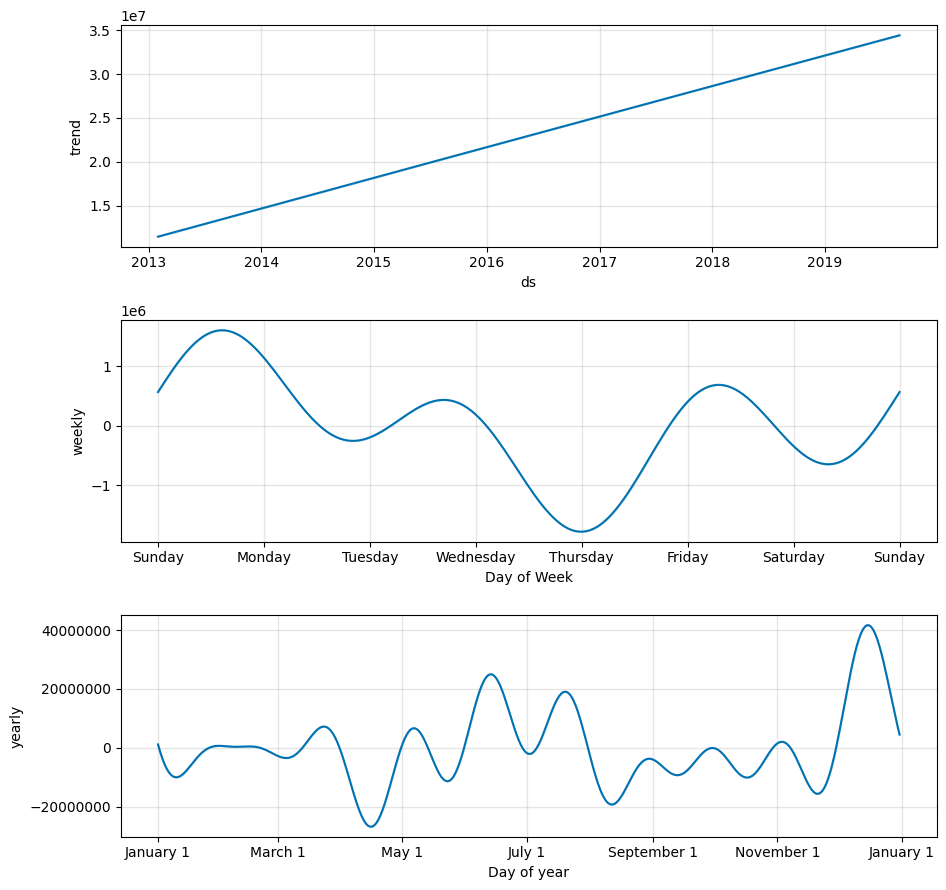

In [36]:
fig2 = model.plot_components(forecast)
plt.ticklabel_format(style='plain' , axis='y')

**The trend shows that ,the sale prices in the store increases year after year**

**On weekly basis , the sale price on sunday is more purchased and the sale price drops down on Thursday based on purchase of items**

**On yearly basis , purchase of items drops down in May 1st while purchase of items increases on January 1st**

# **Cross Validation**

In [37]:
df.shape

(56, 9)

In [38]:
from prophet.diagnostics import cross_validation


df_cv = cross_validation(model ,
                         horizon = '365 days',
                         initial = '730 days' ,
                         parallel = 'processes')


df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-03-31,3.838508e+07,3.756924e+07,3.918867e+07,1.559861e+07,2015-03-02 12:00:00
1,2015-04-30,2.621409e+07,2.544780e+07,2.709230e+07,1.495507e+07,2015-03-02 12:00:00
2,2015-05-31,1.035473e+07,9.525933e+06,1.123504e+07,1.773037e+07,2015-03-02 12:00:00
3,2015-06-30,2.383605e+07,2.297473e+07,2.462826e+07,2.161536e+07,2015-03-02 12:00:00
4,2015-07-31,3.290704e+07,3.203141e+07,3.374485e+07,2.220962e+07,2015-03-02 12:00:00


In [39]:
# # Fit the model using the best parameters

# model_2 = Prophet(seasonality_mode = best_params['seasonality_mode'],
#               seasonality_prior_scale = best_params['seasonality_prior_scale'] ,
#               changepoint_prior_scale =  best_params['changepoint_prior_scale'])

# #Fit the model on a traning dataset
# model_2.fit(df)

# #cross validation

# model_2_cv = cross_validation(initial = 2017 , 
#                               period = 0 ,
#                               horizon = 2 ,
#                               parallel ='processes' )

# # model performance merics 
# model_2_p = performance_metrics(model_2_cv , rolling_window = 1)
# model_2_p['mape'].values[0]

# save and load the model


In [40]:
# save and load the model
from joblib import load , dump

#saving the model
dump(model, filename="facebookprophet_model.joblib")

#loading the model
model = load("facebookprophet_model.joblib")
model

# **Load Test Dataset**

In [41]:
df_test = pd.read_csv("test.csv")
df_test.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [42]:
df_test.dtypes.date

dtype('O')

In [43]:
#parse dates
df_test = pd.read_csv("test.csv" , low_memory = False , parse_dates = ['date'] )
df_test.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [44]:
df_test.dtypes.date

dtype('<M8[ns]')

In [45]:
# Clean data

#cleaning numeric columns first
df_numeric = df.select_dtypes(include = ['int64' ,'int32' ,'float64'])
df_numeric =  df_numeric.fillna(df_numeric.median())
df.update(df_numeric)


#cleaning object variables by turning them into category

df_object = df.select_dtypes(include=['object'])

for key in df_object.columns:
    df[key] = pd.Categorical(df_object[key]).codes + 1


df.update(df)

In [46]:
# Add Datetime parameters fron datetime column

df_test['SaleYear'] = df_test.date.dt.year
df_test['SaleMonth'] = df_test.date.dt.month
df_test['SaleDay'] = df_test.date.dt.day

In [47]:
df_test.head(2)

,id,date,store_nbr,family,onpromotion,SaleYear,SaleMonth,SaleDay
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16


In [48]:
#Change data format to fit facebook prophet format model

# Rename column to fit prophet format
df_test.rename(columns={'date' : 'ds'} ,
                    inplace=True)

df_test.head(2)

,id,ds,store_nbr,family,onpromotion,SaleYear,SaleMonth,SaleDay
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16


In [49]:
forecast_test = model.predict(df_test)

In [50]:
forecast_test.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-16,2.732686e+07,7.454701e+06,1.379014e+07,2.732686e+07,2.732686e+07,-1.671269e+07,-1.671269e+07,-1.671269e+07,190025.576983,190025.576983,190025.576983,-1.690272e+07,-1.690272e+07,-1.690272e+07,0.0,0.0,0.0,1.061418e+07
1,2017-08-16,2.732686e+07,7.530812e+06,1.388842e+07,2.732686e+07,2.732686e+07,-1.671269e+07,-1.671269e+07,-1.671269e+07,190025.576983,190025.576983,190025.576983,-1.690272e+07,-1.690272e+07,-1.690272e+07,0.0,0.0,0.0,1.061418e+07


In [51]:
submission = pd.DataFrame()
submission['id'] = df_test.id
submission['sales'] = forecast_test.yhat
submission.head()

,id,sales
0,3000888,1.061418e+07
1,3000889,1.061418e+07
2,3000890,1.061418e+07
3,3000891,1.061418e+07
4,3000892,1.061418e+07


In [52]:
submission['sales'] = submission['sales'].astype('int64')

In [53]:
submission.head()

,id,sales
0,3000888,10614175
1,3000889,10614175
2,3000890,10614175
3,3000891,10614175
4,3000892,10614175


In [54]:
submission.to_csv("submission.csv" , index=False)

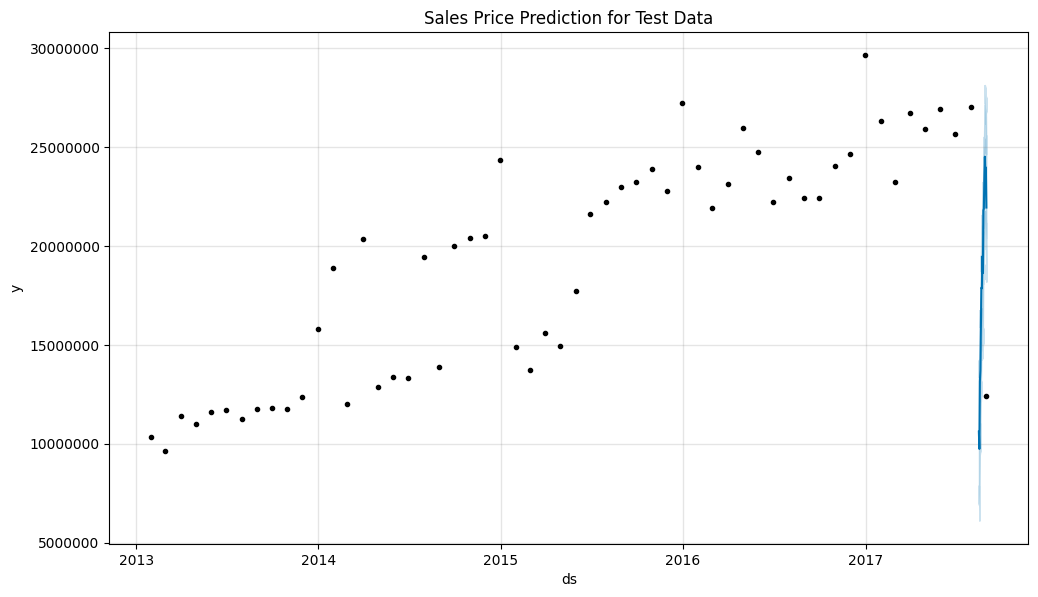

In [55]:
# Plot the forecast_test
fig = model.plot(forecast_test)
plt.title('Sales Price Prediction for Test Data')
plt.ticklabel_format(style='plain' , axis='y')
plt.show()

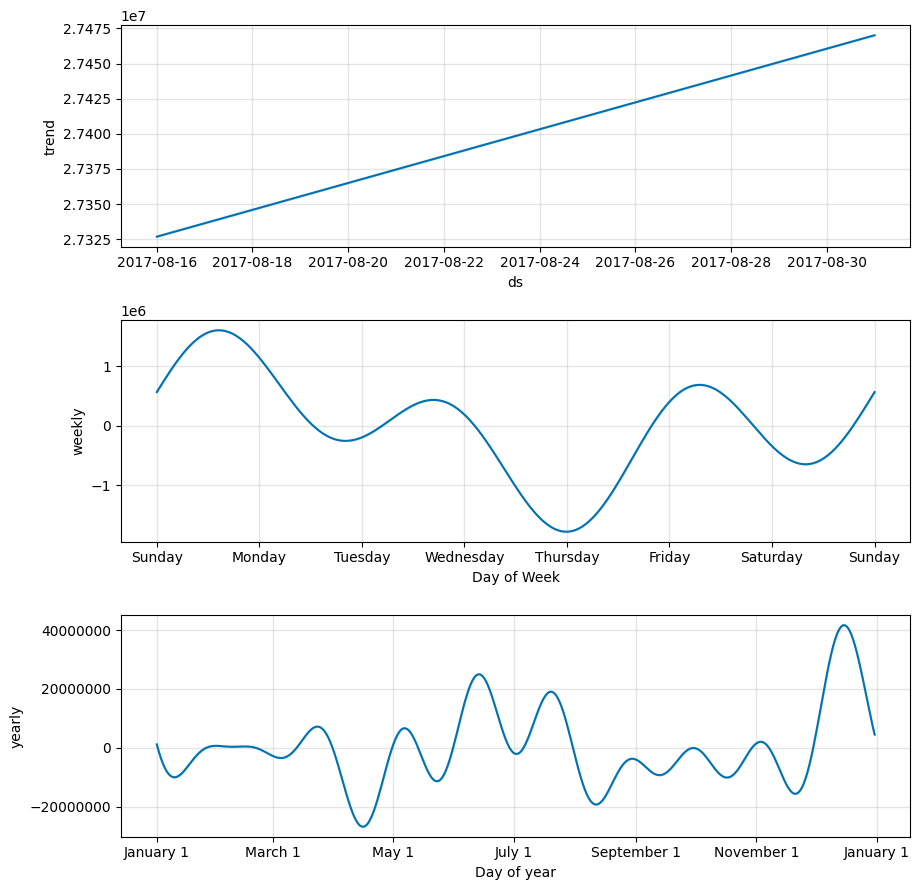

In [56]:
fig2 = model.plot_components(forecast_test)
plt.ticklabel_format(style='plain' , axis='y')